# Histogramas, Binnings (Agrupaciones), y Densidad

Un simple histograma puede ser un excelente primer paso para comprender un conjunto de datos.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

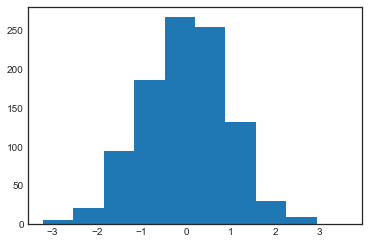

In [2]:
plt.hist(data);

La función ``hist()`` tiene muchas opciones para tunear tanto el cálculo como la visualización. Veamos un ejemplo:

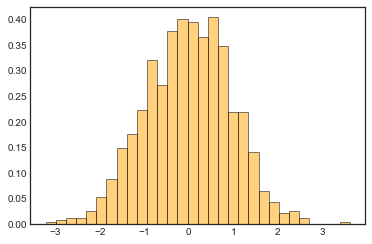

In [3]:
plt.hist(data,
        bins=30,
        alpha=0.5,
        color='orange',
        edgecolor='black',
        density=True);

Si tenemos interés en saber qué somos capaces de hacer con los histogramas, podemos recurrir al docstring de ``plt.hist``, como ya hemos hecho con otros tantos módulos.
Por ejemplo, el factor de transparencia ``alpha`` es muy útil para comparar distribuciones sobre la misma figura:

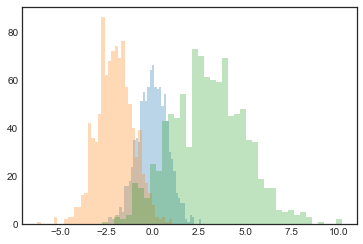

In [36]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='bar', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Si simplemente quisiéramos calcular el histograma (contar el número de puntos en función de las agrupaciones que indiquemos) sin realizar nningún tipo de visualización, podemos utilizar la función `` np.histogram () ``, que es una función de NumPy que nos devuelve únicamente los datos en sí:

In [5]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)
print(bin_edges)

[ 27 280 521 162  10]
[-3.22168113 -1.85397488 -0.48626862  0.88143764  2.2491439   3.61685015]


## Histogramas y agrupaciones de dos dimensiones

Hasta ahora, lo que estamos haciendo es crear histogramas agrupando los valores de una única variable (es decir, de 1 dimensión), tomando como eje X los grupos en función del valor de esa variable, y como eje Y los valores de ese grupo. Sin embargo, también podríamos hacer estas agrupaciones en función de otra variable, llegando a contenedores bidimensionales.

A continuación, veremos ejemplos de cómo hacer esto. Para ello, comenzaremos definiendo algunos datos: una matriz `` x `` e `` y `` extraída de una distribución gaussiana multivariante, aunque podría ser un par de columnas del DataFrame que estemos analizando:

In [34]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: el histograma de 2 dimensinoes

Una forma sencilla de representar un histograma bidimensional es usar la función `` plt.hist2d `` de Matplotlib:

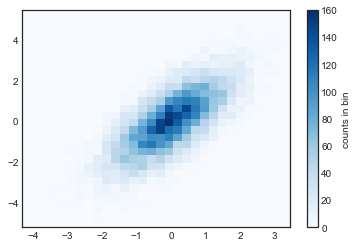

In [35]:
plt.hist2d(x, y, bins=30, cmap='Blues');
cb = plt.colorbar()
cb.set_label("counts in bin")

Al igual que ``plt.hist``, ``plt.hist2d`` tiene una gran cantidad de opciones para adpatar la visualización a lo que querramos ver exactamente, tanto por parte de la gráfica como de las agrupaciones, lo cual está bien documentado en su docstring.

Por otra parte, así como podíamos obtener únicamente los datos de la agrupación de ``plt.hist`` con la función ``np.histogram``, también podremos obtener los datos de ``plt.hist2d`` mediante la función ``np.histogram2d``, la cual podemos utilizar como:

In [109]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

Hemos partido de un problema de 1 dimensión y lo hemos aumentado a 2 dimensiones. Si quisiéramos seguir aumentando las dimensiones, existe una función que generaliza para histogramas de más de 2 dimensiones: ``np.histogramdd``.

### ``plt.hexbin``: Agrupaciones hexagonales

El histograma bidimensional crea una teselación de cuadrados en los ejes, es decir, que realizamos las agrupaciones siguiendo una cuadrícula

Otra forma natural ampliamente extendida para esta teselación, consiste en utilizar hexágonos regulares en lugar de cuadrados.

Para ello, Matplotlib proporciona la función `` plt.hexbin ``, que representará un conjunto de datos bidimensional agrupado mediante una cuadrícula de hexágonos:

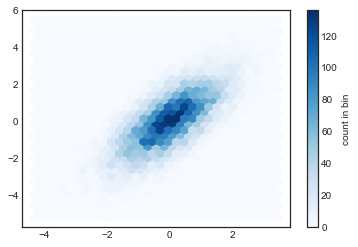

In [42]:
plt.hexbin(x, y, gridsize=30, cmap='Blues');
cb = plt.colorbar(label='count in bin')

``plt.hexbin`` tiene una serie de opciones muy interesantes, incluida la capacidad ponderar (especificar pesos) cada punto y cambiar la salida en cada contenedor a cualquier agregado NumPy (media de pesos, desviación estándar de pesos, etc.). Ya sabes, si quieres más información, puedes consultar su docstring.

### Kernel density estimation (Estimación de densidad del kernel)

Otro método común para evaluar densidades en múltiples dimensiones es Kernel density estimation (KDE).

No nos meteremos a fondo con ello, pero sí que resulta interesante echarle un vistazo por lo que nos aporta gráficamente. Simplemente mencionaremos que podemos pensar en KDE como una forma de "difuminar" los puntos en el espacio y sumar el resultado para suavizar una función.

Existe una implementación de KDE muy rápida y sencilla, para lo que nos basaremos en `` scipy.stats ``.

A continuación, se muestra un ejemplo del uso de KDE con los datos que estamos viendo. No nos meteremos a analizarlo en profundidad, ya que hay algunos conceptos propios de esta implementación que se salen un poco de nuestro objetivo, solamente queremos quedarnos con lo más importante de esta visualización, para que el día de mañana podamos hacer un histograma basado en ello, es decir, lo que nos interesa de aquí es poder modificarlo para adaptarlo a nuestras necesidades:

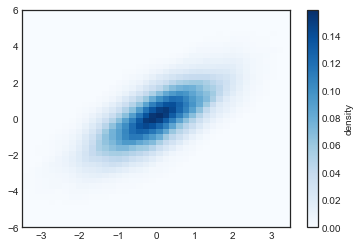

In [44]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape),
           origin='lower', aspect='auto',
           extent=[-3.5, 3.5, -6, 6],
           cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")

KDE tiene una longitud de suavizado que permite obtener un equilibrio entre el detalle y la forma de difuminar la información para obtener una imagen más suave a la vista.

Y es en esa longitud de suavizado donde reside la magia. La literatura sobre la elección de una longitud de suavizado adecuada es amplia: `` gaussian_kde `` usa una regla empírica para intentar encontrar una longitud de suavizado casi óptima para los datos de entrada.

Otras implementaciones de KDE están disponibles dentro del ecosistema SciPy, cada una con sus propias fortalezas y debilidades, donde resultan de especial interés  `` sklearn.neighbors.KernelDensity `` y `` statsmodels.nonparametric.kernel_density.KDEMultivariate ``.

Finalmente, se considera interesante añadir que, por lo general, el uso de Matplotlib para visualizaciones basadas en KDE tiende a ser demasiado detallado. En el futuro, veremos su implemntación con otras librerías, como Seaborn.

## Ejercicio

Vamos a aplicar estos conceptos que hemos visto sobre alguno de nuestros famosos datasets. Por ejemplo, vamos a tomar el dataset del Titanic:
1. Comenzaremos representando el coste del billete ("Fare") en función de la edad ("Age") de cada pasajero, agrupando las edades en 5 grupos. Obtén, además, los grupos que se han echo, es decir, los límites de cada grupo. Para ello, hemos visto alguna función que nos puede ayudar
2. ¿Cómo podríamos hacer para especificarle una agrupación particular? Investiga la [documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) para representar la edad ("Age") de los pasajeros agrupada según los siguientes rangos: ``[0, 12), [12, 18), [18, 25), [25, 45), [45, 65), [65, 80]``. Además, en lugar del conteo, deberás mostrar la densidad, y el color del histograma tendrá que ser verde
3. Imagínate que ahora lo que queremos es obtener estas distribuciones pero en función de la clase a la que perteneciesen, para saber cuántos pasajeros había de cada grupo de edad y cómo se distribuían en función de la clase ("Pclass"). Tendrás que llamar a la función ``hist()`` con cada uno de los DataFrames que obtengas en función de la clase. Para que se puedan comparar, ninguno opacar al resto


In [45]:
import pandas as pd
import numpy as np

In [90]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


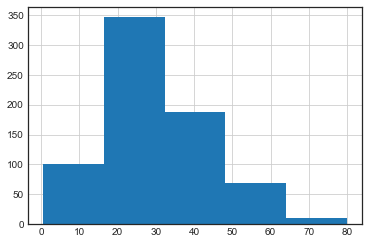

In [49]:
# 1. 
df['Age'].hist(bins=5)

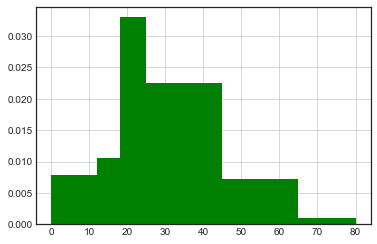

In [52]:
# 2. 
df['Age'].hist(bins=[0, 12, 18, 25, 45, 65, 80], color='green', density=True)

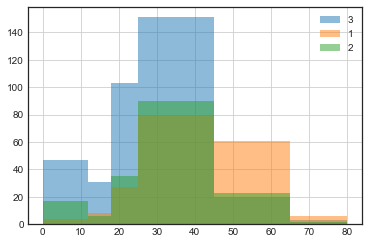

In [86]:
# 3. 

# for i in df['Pclass'].unique():
#     df[df['Pclass']==i]['Age'].hist(bins=[0, 12, 18, 25, 45, 65, 80], alpha=0.5)
    
# for i in df['Pclass'].unique():
#     plt.hist(df[df['Pclass']==i]['Age'], bins=[0, 12, 18, 25, 45, 65, 80], density=True)

for i in df['Pclass'].unique():
    df[df['Pclass']==i]['Age'].hist(bins=[0, 12, 18, 25, 45, 65, 80], alpha=0.5, label=i)
plt.legend()
    

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

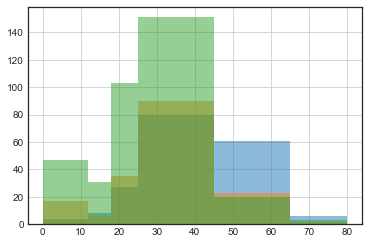

In [80]:
df.groupby("Pclass")['Age'].hist(bins=[0, 12, 18, 25, 45, 65, 80], alpha=0.5)

## Ejercicio 2

Ahora queremos ver cómo interactúa nuestra variable edad con otras variables. Para ello, a partir del mismo df que teníamos en el ejericio anterior:
1. Elimina todos los registros con algún nulo y representa la edad ("Age") en función del precio del billete ("Fare") con un histograma de 2 dimensiones y el cmap que más te guste, agrupándolos en 5 grupitos cada eje. Muestra el colorbar con un nombre identificativo
2. ¿Qué agrupaciones te ha realizado?
3. Repite el mismo ejercicio que en 1 pero con 100 grupos. ¿Cuáles son ahora los límites que te está devolviendo?
2. Realiza este mismo gráfico que en 1 pero con una agrupación de edades según [0, 12), [12, 18), [18, 25), [25, 45), [45, 65), [65, 80] y de precios según [0 10), [10, 20), [20, 30), [30, 50), [50, 75), [75, 100), [100, 200]
3. Comprueba que los límites que te devuelve se corresponden con los que le has pasado
4. Realiza el histograma con una cuadrícula hexagonal de tamaño de celda igual a 10 y con otro cmap

EXTRA: Repite el "Ejercicio 2" entero con otra relación de variables, como las columnas "overpotential" y "value_eur" del conjunto de datos "FIFA20.csv".

Utiliza lo que has aprendido para estudiar otras relaciones


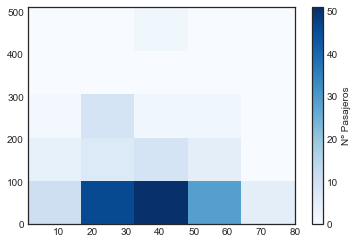

In [107]:
# 1. 
df = df.dropna()
plt.hist2d(df['Age'], df['Fare'], bins=5, cmap='Blues');
cb = plt.colorbar()
cb.set_label("Nº Pasajeros")

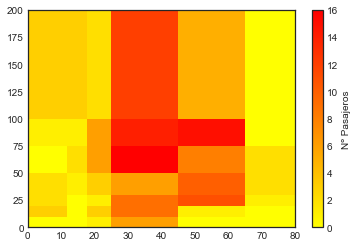

In [106]:
df = df.dropna()
plt.hist2d(df['Age'], df['Fare'], bins=[[0, 12, 18, 25, 45, 65, 80], [0, 10, 20, 30, 50, 75, 100, 200]], cmap='autumn_r');
cb = plt.colorbar()
cb.set_label("Nº Pasajeros")

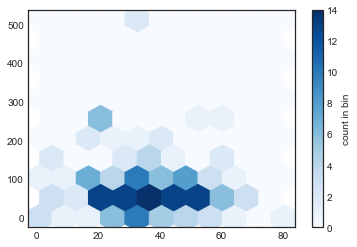

In [116]:
plt.hexbin(df['Age'], df['Fare'], gridsize=10, cmap='Blues');
cb = plt.colorbar(label='count in bin')